In [71]:
import pandas as pd
import pandapower as pp
import pandapower.networks as ppnets
import pandapower.plotting as plt
import matplotlib.pyplot as mplt

In [72]:
net = ppnets.case14()

In [73]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,parallel,df,in_service,max_loading_percent,tap_changer_type
0,None,None,3,6,9900.0,135.0,14.000,2070.288,0.0,0.0,...,NaN,NaN,2.2,NaN,-1.0,1,1.0,True,100.0,Ratio
1,None,None,3,8,9900.0,135.0,0.208,5506.182,0.0,0.0,...,NaN,NaN,3.1,NaN,-1.0,1,1.0,True,100.0,Ratio
2,None,None,4,5,9900.0,135.0,0.208,2494.998,0.0,0.0,...,NaN,NaN,6.8,NaN,-1.0,1,1.0,True,100.0,Ratio
3,None,None,6,7,9900.0,14.0,12.000,1743.885,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1.0,True,100.0,None
4,None,None,6,8,9900.0,14.0,0.208,1089.099,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1.0,True,100.0,None


In [74]:
net.ext_grid['in_service']=False

In [75]:
net.load.scaling = 1.5

In [76]:
net.gen['vm_pu']=1.045

In [77]:
net.gen.loc[0,'p_mw'] = 120
net.gen.loc[1,'p_mw'] = 100
net.gen.loc[2,'p_mw'] = 100
net.gen.loc[3,'slack'] = True

In [78]:
net.gen.loc[0,'slack_weight'] = -40
net.gen.loc[1,'slack_weight'] = 0
net.gen.loc[2,'slack_weight'] = -6
net.gen.loc[3,'slack_weight'] = -6

In [79]:
print(net["bus"].index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [80]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu,geo
0,1,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [1.9673949894, -0.9610198739],..."
1,2,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [2.9779852289, -1.0412882366],..."
2,3,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [3.780660539, -1.6066859687], ..."
3,4,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [3.8337344898, -0.4914657254],..."
4,5,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [2.6937067209, -0.095882852], ..."
5,6,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [2.5321180205, 1.2056156419], ..."
6,7,14.000,b,1.0,True,1.06,0.94,"{""coordinates"": [4.8721406581, -0.2692952825],..."
7,8,12.000,b,1.0,True,1.06,0.94,"{""coordinates"": [5.9042747731, -0.5402149495],..."
8,9,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [4.274948799, 0.5335379916], ""..."
9,10,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [3.2723067024, 0.9619849305], ..."


In [81]:
for i, val in enumerate(net.bus['geo']):
    print(f"{i}: {val}")

0: {"coordinates": [1.9673949894, -0.9610198739], "type": "Point"}
1: {"coordinates": [2.9779852289, -1.0412882366], "type": "Point"}
2: {"coordinates": [3.780660539, -1.6066859687], "type": "Point"}
3: {"coordinates": [3.8337344898, -0.4914657254], "type": "Point"}
4: {"coordinates": [2.6937067209, -0.095882852], "type": "Point"}
5: {"coordinates": [2.5321180205, 1.2056156419], "type": "Point"}
6: {"coordinates": [4.8721406581, -0.2692952825], "type": "Point"}
7: {"coordinates": [5.9042747731, -0.5402149495], "type": "Point"}
8: {"coordinates": [4.274948799, 0.5335379916], "type": "Point"}
9: {"coordinates": [3.2723067024, 0.9619849305], "type": "Point"}
10: {"coordinates": [1.8366837619, 1.0890065149], "type": "Point"}
11: {"coordinates": [2.3371166416, 2.3091630377], "type": "Point"}
12: {"coordinates": [3.3094922817, 2.1179802998], "type": "Point"}
13: {"coordinates": [4.3962052866, 1.6847581464], "type": "Point"}


In [82]:
pp.runpp(net,numba=False)

In [83]:
gen_mw_total = net.res_gen['p_mw'].sum()
imports_mw_total = net.res_ext_grid['p_mw'].sum()

print('total gen MW :', gen_mw_total + imports_mw_total)
print('total imported gen MW :', imports_mw_total)
print('total local gen MW:', gen_mw_total)
print('total load MW:', net.res_load['p_mw'].sum())

total gen MW : 392.01125787131883
total imported gen MW : 0.0
total local gen MW: 392.01125787131883
total load MW: 388.50000000000006


In [84]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,120.0,1.045,NaN,-40.0,50.0,1.0,False,True,-40.0,None,True,140.0,0.0
1,None,2,100.0,1.045,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,100.0,1.045,NaN,-6.0,24.0,1.0,False,True,-6.0,None,True,100.0,0.0
3,None,7,0.0,1.045,NaN,-6.0,24.0,1.0,True,True,-6.0,None,True,100.0,0.0


In [85]:
net.res_gen

,p_mw,q_mvar,va_degree,vm_pu
0,120.000000,16.018684,-6.977821,1.045
1,100.000000,51.092046,-10.625264,1.045
2,100.000000,8.404639,-6.106943,1.045
3,72.011258,15.023973,0.000000,1.045


In [86]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent,geo
0,None,None,0,1,1.0,3.532005,10.783732,768.484773,0.0,42.339020,1.0,1,ol,True,100.0,NaN
1,None,None,0,4,1.0,9.846967,40.649040,716.088084,0.0,42.339020,1.0,1,ol,True,100.0,NaN
2,None,None,1,2,1.0,8.563928,36.080033,637.493051,0.0,42.339020,1.0,1,ol,True,100.0,NaN
3,None,None,1,3,1.0,10.590547,32.134320,494.857619,0.0,42.339020,1.0,1,ol,True,100.0,NaN
4,None,None,1,4,1.0,10.379138,31.689630,503.590401,0.0,42.339020,1.0,1,ol,True,100.0,NaN
5,None,None,2,3,1.0,12.212573,31.170217,186.299339,0.0,42.339020,1.0,1,ol,True,100.0,NaN
6,None,None,3,4,1.0,2.433038,7.674548,0.000000,0.0,42.339020,1.0,1,ol,True,100.0,NaN
7,None,None,5,10,1.0,0.000041,0.000086,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN
8,None,None,5,11,1.0,0.000053,0.000111,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN
9,None,None,5,12,1.0,0.000029,0.000056,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN


In [87]:
lines = net.line.index
critical_lines = []
critical_lines_indx = []

vmax = 1.05
vmin = 0.95
line_loading_max = 100

for l in lines:
    net.line.loc[l, 'in_service'] = False
    pp.runpp(net, numba=False)
    if net.res_bus.vm_pu.max()>vmax:
        critical_lines.append([l, 'hv'])
        critical_lines_indx.append(l)
    if net.res_bus.vm_pu.min() < vmin:
        critical_lines.append([l, 'lv'])
        critical_lines_indx.append(l)
    if net.res_line.loading_percent.max() > line_loading_max:
        critical_lines.append([l, 'ol'])
        critical_lines_indx.append(l)
    net.line.loc[l, 'in_service'] = True



In [88]:
print(critical_lines)
print(critical_lines_indx)

[[9, 'lv'], [11, 'lv']]

[[9, 'lv'], [11, 'lv']]
[9, 11]


[[9, 'lv'], [11, 'lv']]

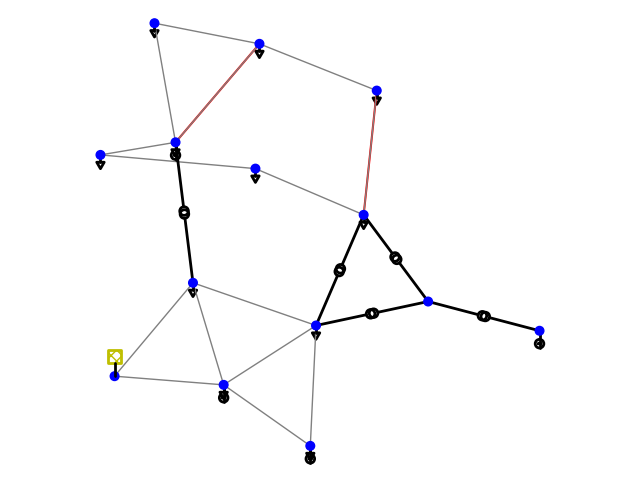

In [89]:
fig, ax = mplt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

critical_lc = plt.create_line_collection(net, critical_lines_indx, color="r", zorder=2) #create lines

plt.draw_collections([critical_lc], ax=ax);
plt.simple_plot(net,  plot_loads=True, plot_gens=True, ax=ax, show_plot=True);

mplt.show()

In [90]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,120.0,1.045,NaN,-40.0,50.0,1.0,False,True,-40.0,None,True,140.0,0.0
1,None,2,100.0,1.045,NaN,0.0,40.0,1.0,False,True,0.0,None,True,100.0,0.0
2,None,5,100.0,1.045,NaN,-6.0,24.0,1.0,False,True,-6.0,None,True,100.0,0.0
3,None,7,0.0,1.045,NaN,-6.0,24.0,1.0,True,True,-6.0,None,True,100.0,0.0


In [91]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu,geo
0,1,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [1.9673949894, -0.9610198739],..."
1,2,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [2.9779852289, -1.0412882366],..."
2,3,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [3.780660539, -1.6066859687], ..."
3,4,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [3.8337344898, -0.4914657254],..."
4,5,135.000,b,1.0,True,1.06,0.94,"{""coordinates"": [2.6937067209, -0.095882852], ..."
5,6,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [2.5321180205, 1.2056156419], ..."
6,7,14.000,b,1.0,True,1.06,0.94,"{""coordinates"": [4.8721406581, -0.2692952825],..."
7,8,12.000,b,1.0,True,1.06,0.94,"{""coordinates"": [5.9042747731, -0.5402149495],..."
8,9,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [4.274948799, 0.5335379916], ""..."
9,10,0.208,b,1.0,True,1.06,0.94,"{""coordinates"": [3.2723067024, 0.9619849305], ..."


In [92]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent,geo
0,None,None,0,1,1.0,3.532005,10.783732,768.484773,0.0,42.339020,1.0,1,ol,True,100.0,NaN
1,None,None,0,4,1.0,9.846967,40.649040,716.088084,0.0,42.339020,1.0,1,ol,True,100.0,NaN
2,None,None,1,2,1.0,8.563928,36.080033,637.493051,0.0,42.339020,1.0,1,ol,True,100.0,NaN
3,None,None,1,3,1.0,10.590547,32.134320,494.857619,0.0,42.339020,1.0,1,ol,True,100.0,NaN
4,None,None,1,4,1.0,10.379138,31.689630,503.590401,0.0,42.339020,1.0,1,ol,True,100.0,NaN
5,None,None,2,3,1.0,12.212573,31.170217,186.299339,0.0,42.339020,1.0,1,ol,True,100.0,NaN
6,None,None,3,4,1.0,2.433038,7.674548,0.000000,0.0,42.339020,1.0,1,ol,True,100.0,NaN
7,None,None,5,10,1.0,0.000041,0.000086,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN
8,None,None,5,11,1.0,0.000053,0.000111,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN
9,None,None,5,12,1.0,0.000029,0.000056,0.000000,0.0,27479.652235,1.0,1,ol,True,100.0,NaN


In [93]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,21.7,12.7,0.0,0.0,NaN,1.5,True,None,False
1,None,2,94.2,19.0,0.0,0.0,NaN,1.5,True,None,False
2,None,3,47.8,-3.9,0.0,0.0,NaN,1.5,True,None,False
3,None,4,7.6,1.6,0.0,0.0,NaN,1.5,True,None,False
4,None,5,11.2,7.5,0.0,0.0,NaN,1.5,True,None,False
5,None,8,29.5,16.6,0.0,0.0,NaN,1.5,True,None,False
6,None,9,9.0,5.8,0.0,0.0,NaN,1.5,True,None,False
7,None,10,3.5,1.8,0.0,0.0,NaN,1.5,True,None,False
8,None,11,6.1,1.6,0.0,0.0,NaN,1.5,True,None,False
9,None,12,13.5,5.8,0.0,0.0,NaN,1.5,True,None,False


In [94]:
net.res_load

,p_mw,q_mvar
0,32.55,19.05
1,141.30,28.50
2,71.70,-5.85
3,11.40,2.40
4,16.80,11.25
5,44.25,24.90
6,13.50,8.70
7,5.25,2.70
8,9.15,2.40
9,20.25,8.70


In [95]:
profiles = 0


In [96]:
profiles = pd.read_csv('testload.csv')
profiles = profiles.drop(columns='time')
profiles.columns = range(profiles.shape[1])

In [97]:
from pandapower.timeseries import DFData
ds = DFData(profiles)

In [98]:
print(ds.df)

         0       1       2      3      4        5      6       7       8   \
0   12.4775  54.165  27.485  5.320   6.44  16.9625  6.300  2.4500  4.2700   
1   11.9350  51.810  26.290  4.940   6.16  16.2250  5.850  2.2750  3.9650   
2   11.3925  49.455  25.095  4.560   5.88  15.4875  5.400  2.1000  3.6600   
3   10.8500  47.100  23.900  4.180   5.60  14.7500  4.950  1.9250  3.3550   
4   11.3925  49.455  25.095  3.990   5.88  15.4875  4.725  1.8375  3.2025   
5   11.9350  51.810  26.290  3.800   6.16  16.2250  4.500  1.7500  3.0500   
6   13.0200  56.520  28.680  3.990   6.72  17.7000  4.725  1.8375  3.2025   
7   15.1900  65.940  33.460  4.180   7.84  20.6500  4.950  1.9250  3.3550   
8   18.4450  80.070  40.630  4.560   9.52  25.0750  5.400  2.1000  3.6600   
9   19.5300  84.780  43.020  4.940  10.08  26.5500  5.850  2.2750  3.9650   
10  21.7000  94.200  47.800  5.092  11.20  29.5000  6.030  2.3450  4.0870   
11  19.5300  84.780  43.020  5.244  10.08  26.5500  6.210  2.4150  4.2090   

In [99]:
print(profiles.index)
print(profiles.columns)
print(ds.df.index)

RangeIndex(start=0, stop=24, step=1)
RangeIndex(start=0, stop=11, step=1)
RangeIndex(start=0, stop=24, step=1)


In [ ]:
from pandapower.control import ConstControl

for i in range(11):
    ConstControl(net, 
                 element='load', 
                 variable='p_mw', 
                 element_index=[i], 
                 data_source=ds, 
                 profile_name=i)

In [ ]:
print(ConstControl)

AttributeError: type object 'ConstControl' has no attribute 'df'

In [ ]:
# def create_controllers(net, ds):
#     ConstControl(net, element='load', variable='p_mw', element_index=[0],
#                  data_source=ds, profile_name=i)

In [ ]:
def create_output_writer(net, time_steps, output_dir):
    ow = OutputWriter(net, 
                      time_steps, 
                      output_path=output_dir, 
                      output_file_type=".xlsx", 
                      log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_load', 'p_mw')
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_line', 'i_ka')
    return ow

In [ ]:
from pandapower.timeseries import run_timeseries

def timeseries_example(output_dir):
    # 1. create test net

    # 2. create (random) data source
    n_timesteps = 24
    # 3. create controllers (to control P values of the load and the sgen)
    # create_controllers(net, ds)

    # time steps to be calculated. Could also be a list with non-consecutive time steps
    time_steps = range(0, n_timesteps)

    # 4. the output writer with the desired results to be stored to files.
    ow = create_output_writer(net, 
                              time_steps, 
                              output_dir=output_dir)

    # 5. the main time series function
    run_timeseries(net, time_steps)
    print(net.res_line.loading_percent)


In [104]:
from pandapower.timeseries import OutputWriter
import tempfile
import os

output_dir = os.path.join(tempfile.gettempdir(), "time_series_example")
print("Results can be found in your local temp folder: {}".format(output_dir))
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
timeseries_example(output_dir)

Results can be found in your local temp folder: C:\Users\User\AppData\Local\Temp\time_series_example



100%|██████████| 24/24 [00:00<00:00, 112.98it/s]


0     0.179873
1     0.200087
2     0.135442
3     0.406762
4     0.300552
5     0.296476
6     0.490742
7     0.342369
8     0.117524
9     0.312033
10    0.222262
11    0.120557
12    0.300144
13    0.042069
14    0.220266
Name: loading_percent, dtype: float64


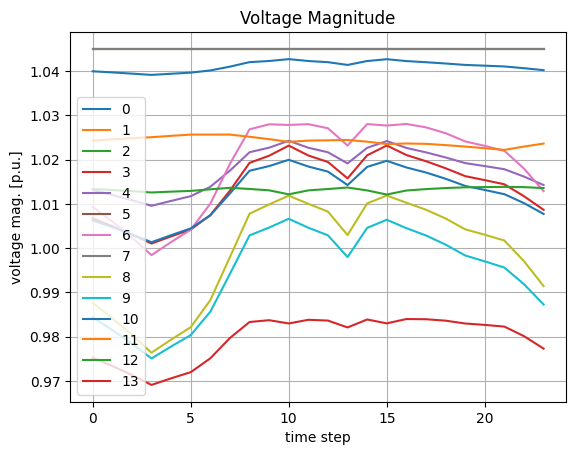

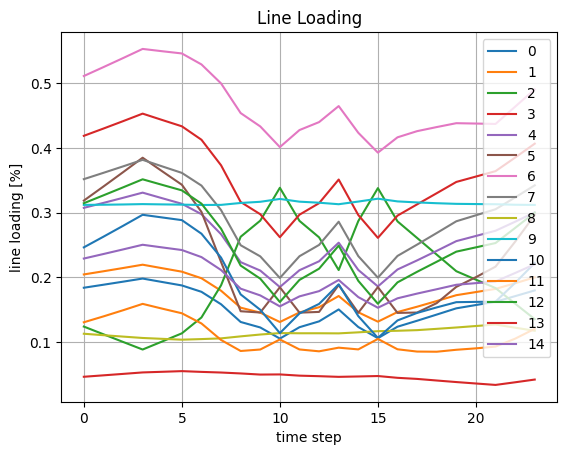

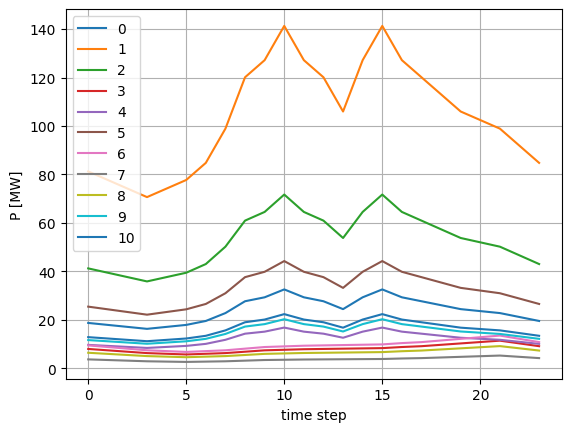

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline  

# voltage results
vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.xlsx")
vm_pu = pd.read_excel(vm_pu_file, index_col=0)
vm_pu.plot(label="vm_pu")
plt.xlabel("time step")
plt.ylabel("voltage mag. [p.u.]")
plt.title("Voltage Magnitude")
plt.grid()
plt.show()

# line loading results
ll_file = os.path.join(output_dir, "res_line", "loading_percent.xlsx")
line_loading = pd.read_excel(ll_file, index_col=0)
line_loading.plot(label="line_loading")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Line Loading")
plt.grid()
plt.show()

# load results
load_file = os.path.join(output_dir, "res_load", "p_mw.xlsx")
load = pd.read_excel(load_file, index_col=0)
load.plot(label="load")
plt.xlabel("time step")
plt.ylabel("P [MW]")
plt.grid()
plt.show()

In [ ]:
net.res_

,p_mw,q_mvar,va_degree,vm_pu
0,120.000000,28.690062,16.972718,1.045
1,100.000000,40.285330,15.553573,1.045
2,100.000000,10.582512,16.099838,1.045
3,-72.620129,23.473572,0.000000,1.045
